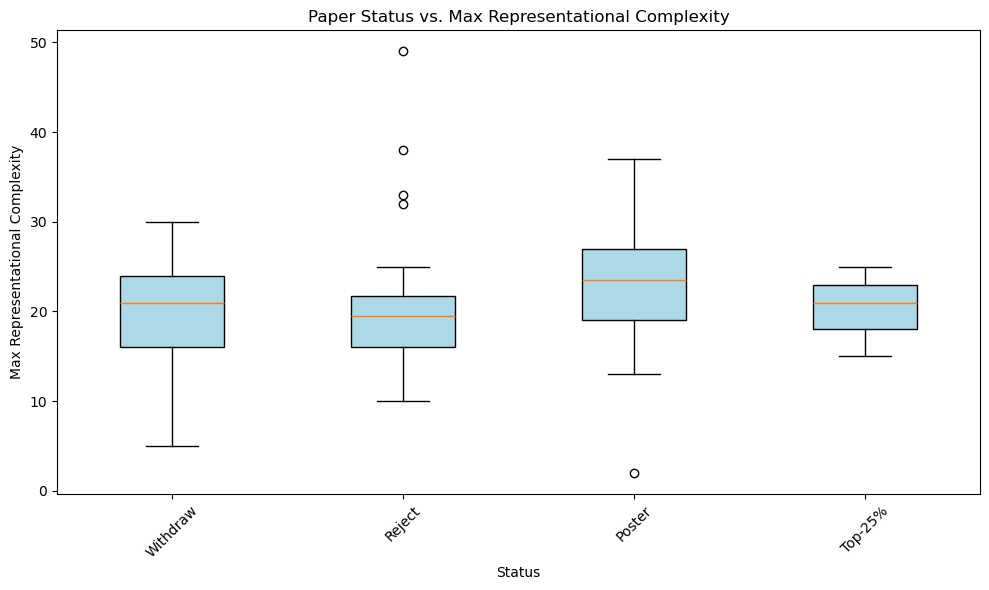

In [38]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Load data from JSON files
with open('arXiv_src_fetcher/ICLR_2023.json', 'r') as file1:
    iclr_data = json.load(file1)

with open('math_extraction/parsed_papers.json', 'r') as file2:
    parsed_papers_data = json.load(file2)

# Initialize data storage for plotting
status_to_complexity = defaultdict(list)
status_to_num_equations = defaultdict(list)
status_to_num_overall_unique_symbols = defaultdict(list)

# Map data using 'id'
for paper in iclr_data:
    paper_id = paper.get('id')
    status = paper.get('status')
    
    # Check if the paper ID exists in the second file
    if paper_id in parsed_papers_data:
        max_complexity = parsed_papers_data[paper_id].get('max_representational_complexity')
        if max_complexity is not None:
            status_to_complexity[status].append(max_complexity)
        
        num_equations = parsed_papers_data[paper_id].get('num_equations')
        if num_equations is not None:
            status_to_num_equations[status].append(num_equations)
        
        num_overall_unique_symbols = parsed_papers_data[paper_id].get('num_overall_unique_symbols')
        if num_overall_unique_symbols is not None:
            status_to_num_overall_unique_symbols[status].append(num_overall_unique_symbols)

# Prepare data for plotting
statuses = []
complexities = []
for status, complexity_values in status_to_complexity.items():
    statuses.append(status)
    complexities.append(complexity_values)

# Create the plot
plt.figure(figsize=(10, 6))
plt.boxplot(complexities, labels=statuses, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Paper Status vs. Max Representational Complexity")
plt.xlabel("Status")
plt.ylabel("Max Representational Complexity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


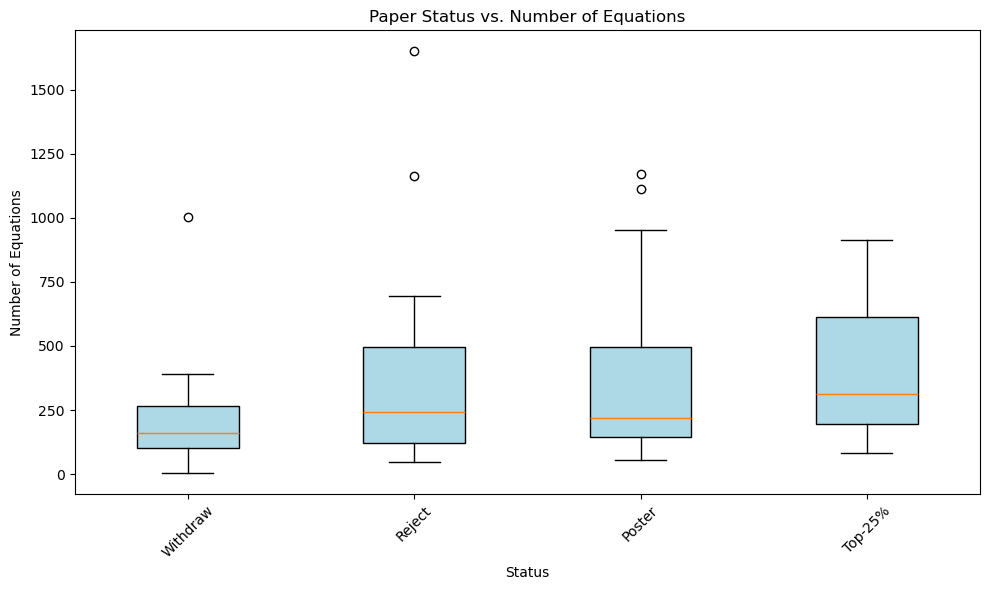

In [41]:
# Prepare data for plotting
statuses = []
num_equations_values = []
for status, num_equations in status_to_num_equations.items():
    statuses.append(status)
    num_equations_values.append(num_equations)
# Create the plot
plt.figure(figsize=(10, 6))
plt.boxplot(num_equations_values, labels=statuses, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Paper Status vs. Number of Equations")
plt.xlabel("Status")
plt.ylabel("Number of Equations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

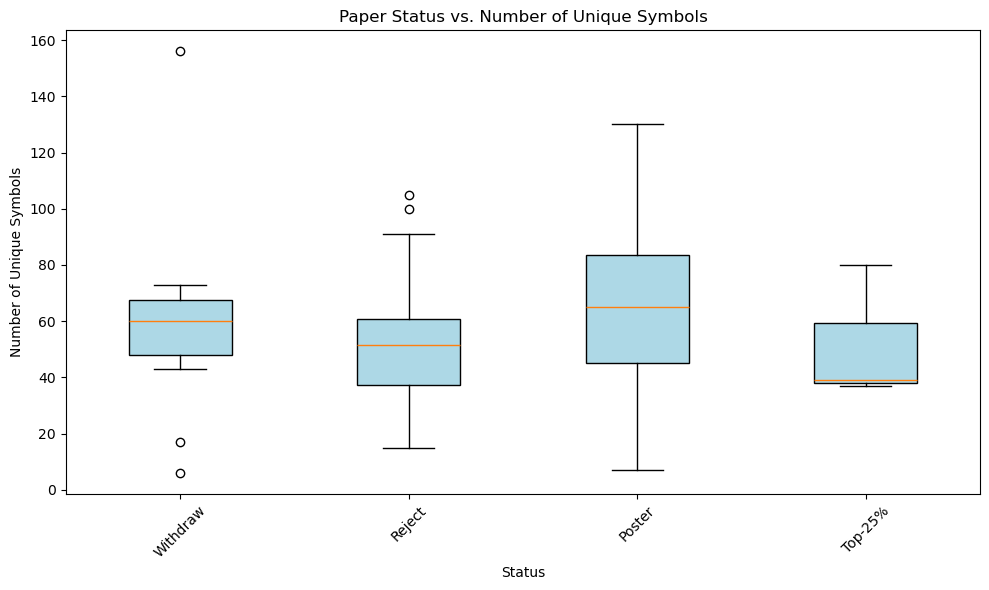

In [43]:
# Prepare data for plotting
statuses = []
num_overall_unique_symbols_values = []
for status, num_overall_unique_symbols in status_to_num_overall_unique_symbols.items():
    statuses.append(status)
    num_overall_unique_symbols_values.append(num_overall_unique_symbols)
# Create the plot
plt.figure(figsize=(10, 6))
plt.boxplot(num_overall_unique_symbols_values, labels=statuses, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Paper Status vs. Number of Unique Symbols")
plt.xlabel("Status")
plt.ylabel("Number of Unique Symbols")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()